In [113]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [114]:
path = '/Users/richardpark/Desktop/2022_1st_semester/인공신경망/project/data_수정'

In [115]:
dir  = [path+'/aa', path+'/ba', path+'/bb', path+'/bc',  path+'/ca', path+'/cb', path+'/cc']

dataset = []
all_data = []
for i in dir:
    subset = []
    for dirname, _, filenames in os.walk(i):
        for filename in filenames:
#             print(dirname +'/'+filename)
            if '.ini' not in filename:
                subset.append(dirname +'/'+filename)
                all_data.append(dirname +'/'+filename)
    dataset.append(subset)

In [116]:
print(len(dataset))

7


43


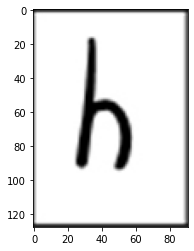



36


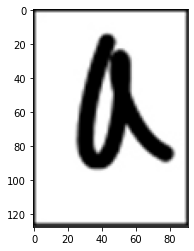



37


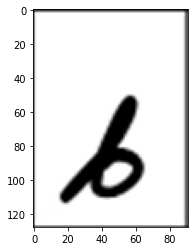



41


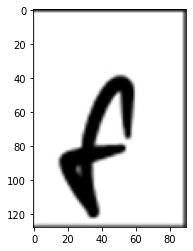



37


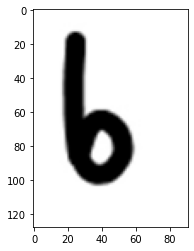



41


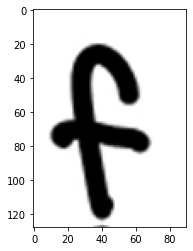



42


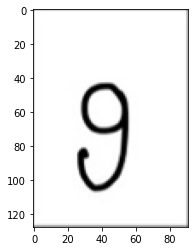



38


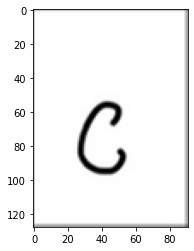



37


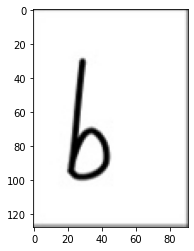



41


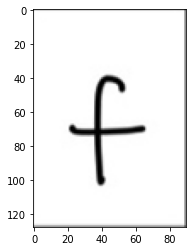



42


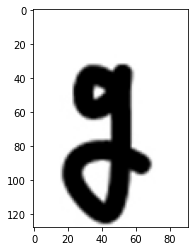



38


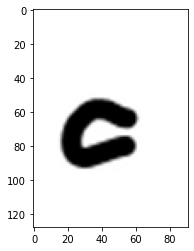



42


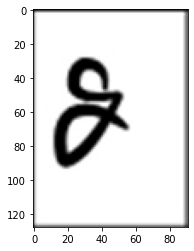



38


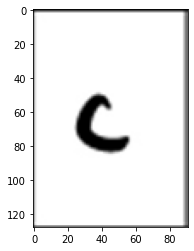



44


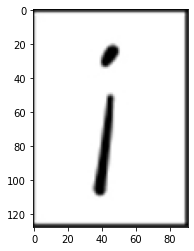



45


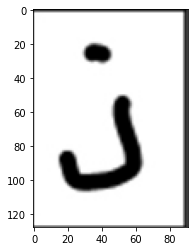



39


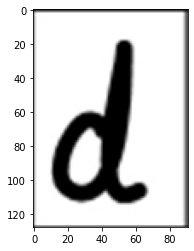



38


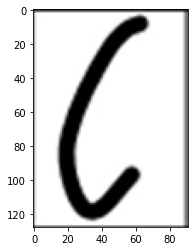



42


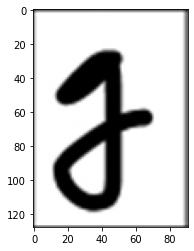



41


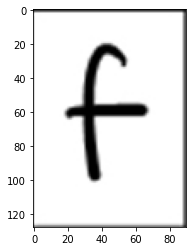



37


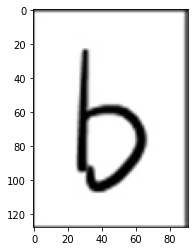



39


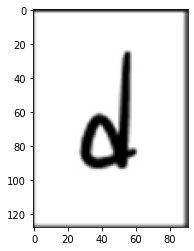



45


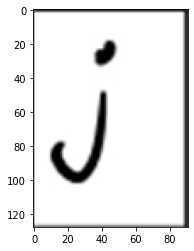



44


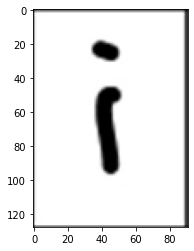



36


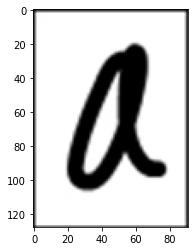



43


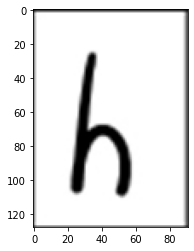



40


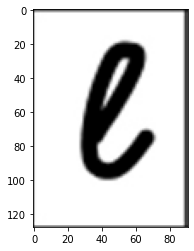



37


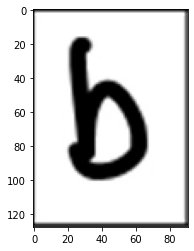



41


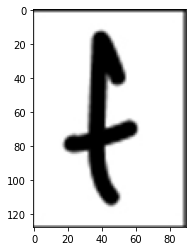



44


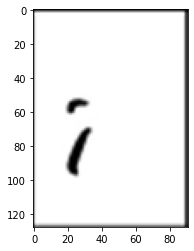



40


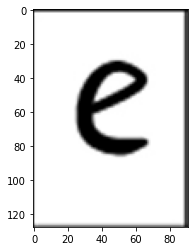



36


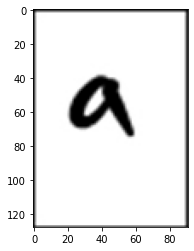



45


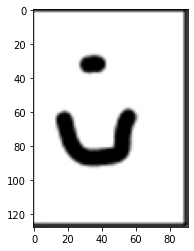



40


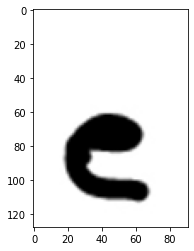



36


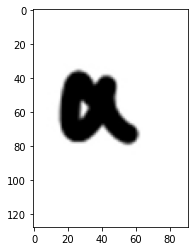



43


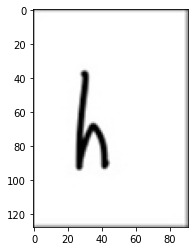



45


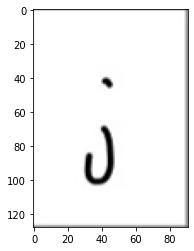



44


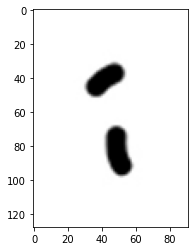



39


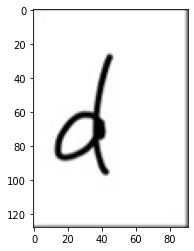



40


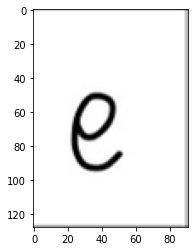



36


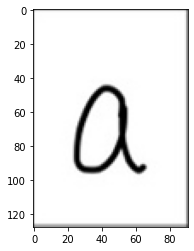



43


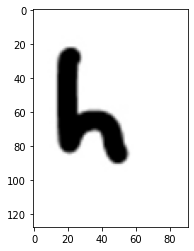



45


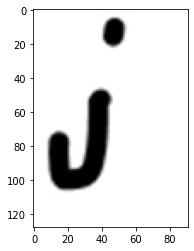



44


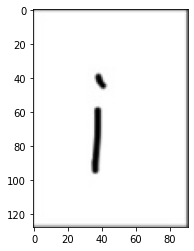



39


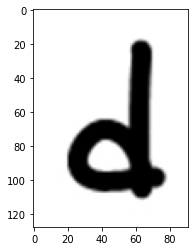



45


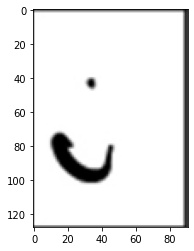



39


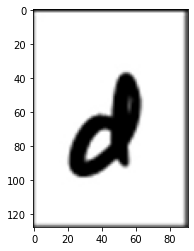



43


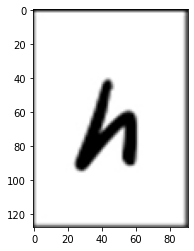



42


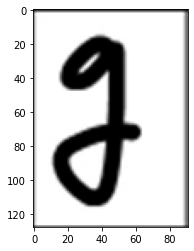



38


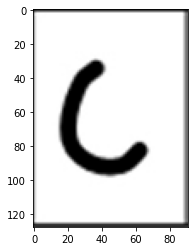



39


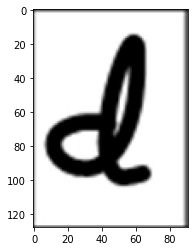



45


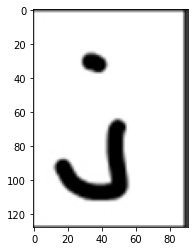



44


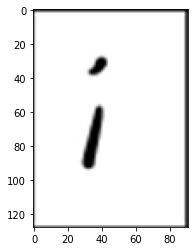



36


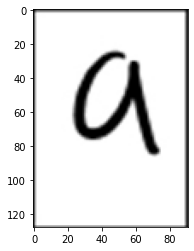



43


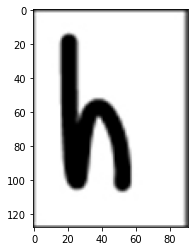



40


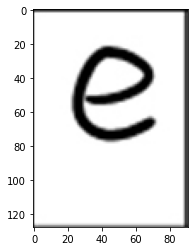



40


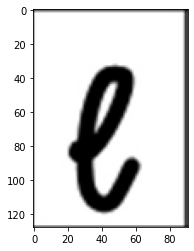



36


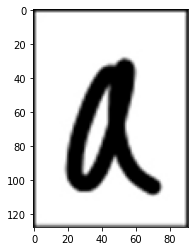



43


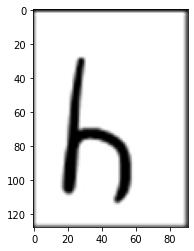



45


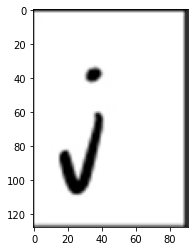



44


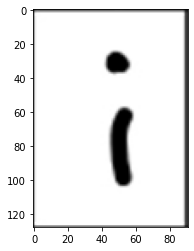



39


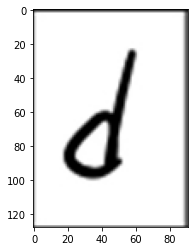



38


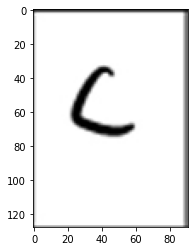



42


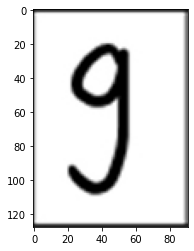



36


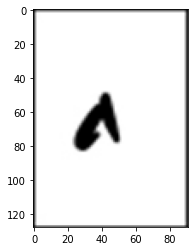



40


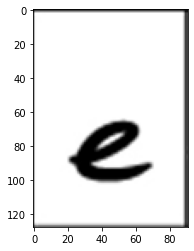



44


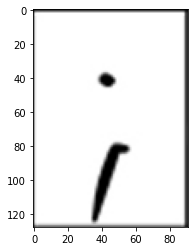



39


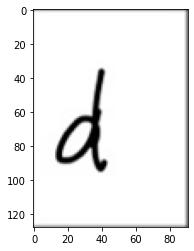



44


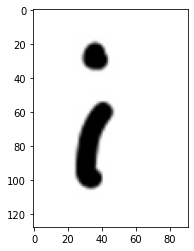



36


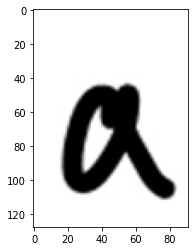



43


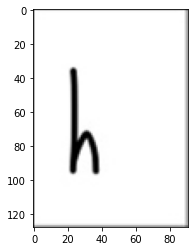



40


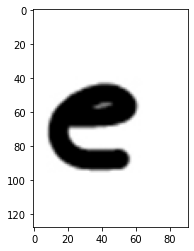



39


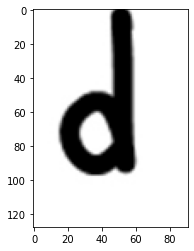



45


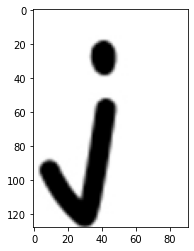



44


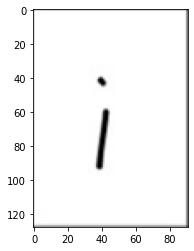



36


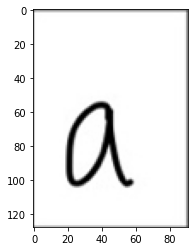



43


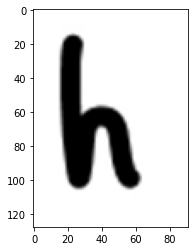



40


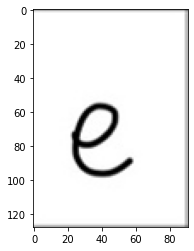



43


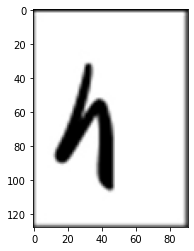



39


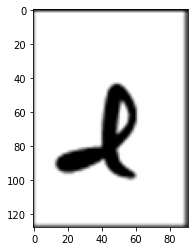



45


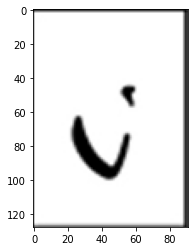



41


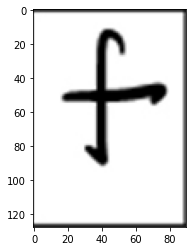



37


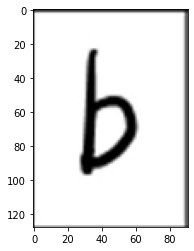



40


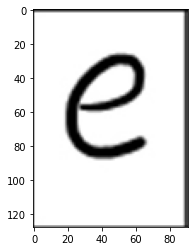



36


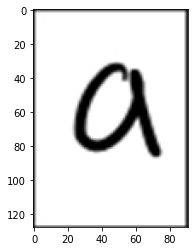



43


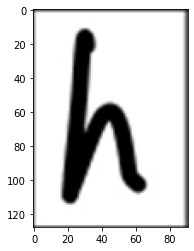



45


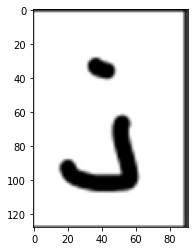



44


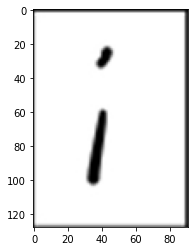



39


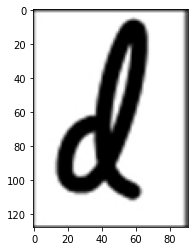



37


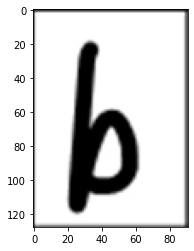



41


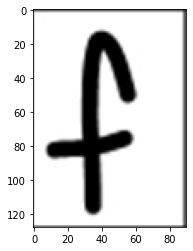



42


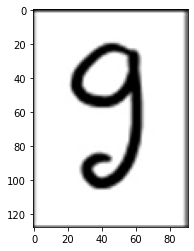



38


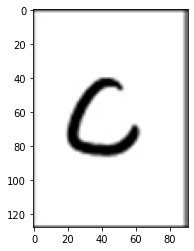



39


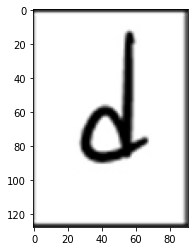



44


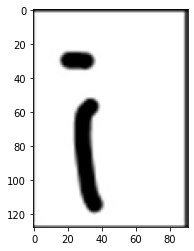



45


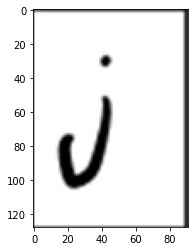



41


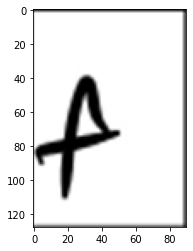



37


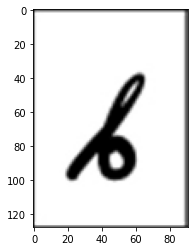



38


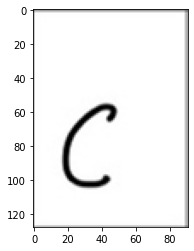



42


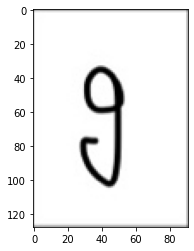

In [117]:
import numpy as np
label = []
for i, file in enumerate(dataset):
    for data in file:
        label.append((int(data[74:-4])-1)%10+i*10)
label[1700:] = (np.array(label[1700:])-4).tolist()

for i in range(2000,2100):
    a = plt.imread(all_data[i])
    plt.imshow(a)
    print(label[i])
    plt.show()
    print('\n')

In [118]:
print(len(label))

3100


In [119]:
# label

In [120]:
len(all_data)

3100

In [121]:
# img_list = []
# for dirname, _, filenames in os.walk(path):
#     for filename in filenames:
# #         print(filename)
#         img_list.append(filename)
# img_list[:5]

# label = []
# for image in img_list :
#     a = image.split(' ')
#     b = a[0].split('_')
#     final = int(b[1][1])-1
#     if final == -1 :
#         label.append('0')
#     else :
#         label.append(str(final))
# # print((label))

In [142]:
def resize_convert_img(img_list) :
    final = []
    for i in img_list :
        if i.endswith('.jpg'):
            img_path = i
            image = img.imread(img_path)
            resize_img = cv2.resize(image, (28, 28))
            gray_image = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)
            grey_image = gray_image / 255
            grey_image = 1 - grey_image
            grey_image = grey_image.T
            flattened_grey_image = grey_image.flatten()
            final.append(flattened_grey_image)
    return final

In [143]:
def shit(img_list) :
    for i in img_list :
        if i.endswith('.jpg'):
            img_path = i
            image = img.imread(img_path)
            resize_img = cv2.resize(image, (28, 28))
            gray_image = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)
            grey_image = gray_image / 255
            grey_image = 1 - grey_image
    return grey_image

In [144]:
len(resize_convert_img(all_data))

3100

In [166]:
def save_to_csv(resize_convert_img_list, label) :
    columns_idx = []
    
    for i in range(784) :
        columns_idx.append(i)
    df = pd.DataFrame(columns = columns_idx)
    for idx in range(len(resize_convert_img_list)) :
        df.loc[idx] = resize_convert_img_list[idx]
    
    df.insert(0, 'label', label) # label column 추가 
    
    df.to_csv("test_1.csv", index=False)

In [167]:
save_to_csv(resize_convert_img(all_data), label)

In [168]:
# columns_idx = []
# for i in range(784) :
#     columns_idx.append(i)
# df = pd.DataFrame(columns = columns_idx)

In [169]:
# df.loc[0] = resize_convert_img(img_list)[0]
# df

In [170]:
# df.to_csv("test.csv")

In [171]:
a = pd.read_csv("test_1.csv")

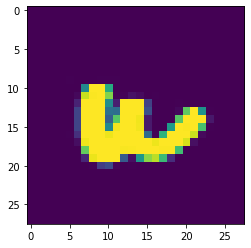

In [172]:
plt.imshow(shit(all_data))

In [173]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [174]:
balanced_train = pd.read_csv("./test_1.csv")

In [175]:
train_x = balanced_train.iloc[:,1:]
train_y = balanced_train.iloc[:,0]

# Normalise data
x_train = np.array(train_x) / 255.0
y_train = np.array(train_y)


#Reshaping all images into 28*28 for pre-processing
x_train = x_train.reshape(x_train.shape[0], 28, 28)

print(x_train.shape)

#Reshaping all images into 28*28 for pre-processing
x_train = x_train.reshape(x_train.shape[0], 28, 28)

print(x_train.shape)


def image(data):
        image = np.fliplr(data)
        image = np.rot90(image)
        return image

def create_images(data, start, end):
    images = []
    for i in range(start,end):
        images.append(image(data[i]))
    return images


(3100, 28, 28)
(3100, 28, 28)


0
[  3  15  21  23  26  34  83  88  95 101 107 112 138 149 163 169 173 178
 184 188 197 204 213 224 248 263 278 284 289 295 310 316 327 333 341 347
 357 373 386 388 391 398 411 414 463 473 478 483 490 497]


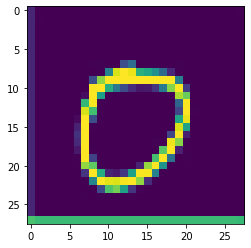

1
[  0  37  44  48  50  53  63  66  70  74  79 117 119 132 136 141 143 171
 191 216 222 229 233 240 247 250 255 259 273 281 300 324 343 352 360 364
 371 378 380 419 422 424 428 435 445 450 454 458 461 499]


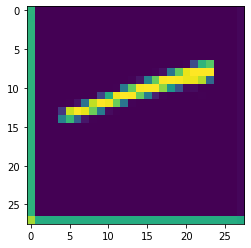

2
[ 32  38  41  43  47  54  64  69  73  77  80  86 122 124 129 133 146 158
 207 219 226 230 237 243 244 258 262 267 270 285 304 318 337 349 356 363
 367 375 412 418 425 429 431 434 444 447 451 455 460 466]


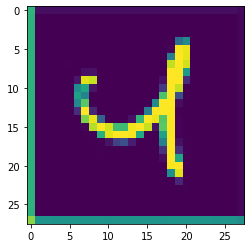

3
[  5   9  12  18  28  58  61  90  98 104 110 114 128 152 154 159 165 181
 187 193 200 209 215 236 252 268 274 292 298 302 306 312 321 330 336 344
 353 368 383 393 400 403 408 437 440 470 474 480 486 494]


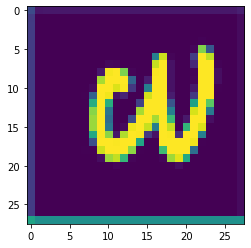

4
[  4  13  19  22  27  33  82  89  94  99 105 113 137 147 164 170 174 176
 182 189 198 205 211 223 249 265 279 283 287 293 311 317 325 331 340 348
 359 374 384 389 392 399 409 416 465 471 479 484 491 495]


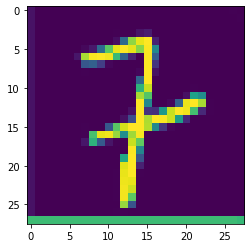

5
[  1  36  45  49  51  52  62  67  71  75  78 118 120 131 135 140 144 172
 192 217 221 228 232 241 246 251 256 260 272 280 299 323 342 351 361 365
 372 377 379 420 421 423 427 436 446 449 453 457 462 498]


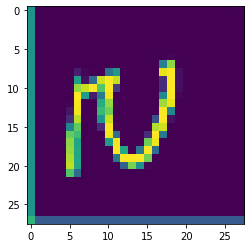

6
[ 31  39  40  42  46  55  65  68  72  76  81  85 121 125 130 134 145 157
 206 218 227 231 238 242 245 257 261 266 271 286 305 319 338 350 355 362
 366 376 413 417 426 430 432 433 443 448 452 456 459 467]


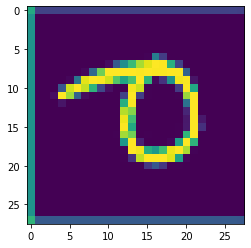

7
[  2   8  14  20  25  35  84  87 100 106 108 111 123 139 148 153 162 168
 177 183 196 203 208 212 225 239 264 277 288 294 303 309 315 322 326 332
 346 358 385 390 397 405 410 415 464 472 476 477 482 496]


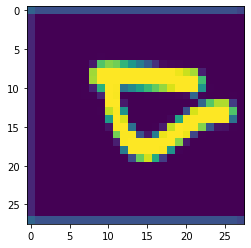

8
[  6  10  16  24  29  57  60  91  96  97 102 115 127 142 150 160 166 175
 179 185 190 194 201 214 220 235 254 275 282 290 296 307 313 328 334 339
 345 370 381 387 394 401 406 439 442 468 481 487 489 492]


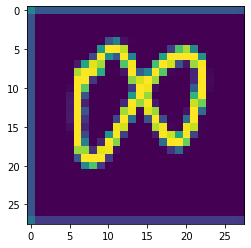

9
[  7  11  17  30  56  59  92  93 103 109 116 126 151 155 156 161 167 180
 186 195 199 202 210 234 253 269 276 291 297 301 308 314 320 329 335 354
 369 382 395 396 402 404 407 438 441 469 475 485 488 493]


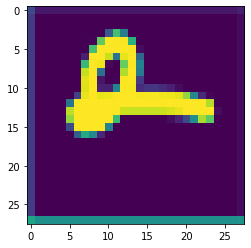

10
[513 523 534 543 553 562 565 571 576 580 590 603 612 623 641 648 653 660
 668 690 701 726 731 733 739 754 756 765 770 776 783 811 822 843 857 863
 866 870 889 905 910 916 926 933 938 949 959 962 966 987]


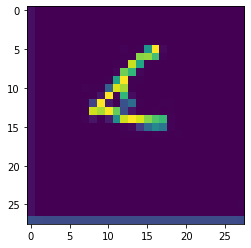

11
[503 508 519 525 530 549 559 578 588 609 610 614 625 636 663 672 680 684
 688 694 698 704 706 710 720 729 781 790 796 800 805 813 817 827 832 834
 840 849 876 881 886 896 900 919 954 971 981 991 995 996]


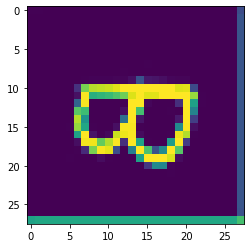

12
[500 505 511 522 527 540 550 585 595 606 617 628 632 633 643 671 677 681
 685 693 697 707 711 713 719 748 763 791 799 804 808 814 818 824 826 831
 841 869 879 883 893 898 903 922 953 974 975 978 988 999]


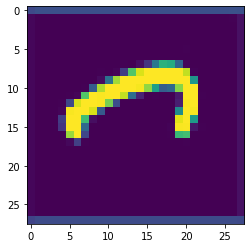

13
[506 516 531 538 547 557 563 568 584 594 598 600 618 629 639 645 651 656
 666 674 715 724 736 742 745 752 759 768 774 780 786 795 838 846 852 855
 861 873 892 909 913 923 930 936 942 944 946 956 970 984]


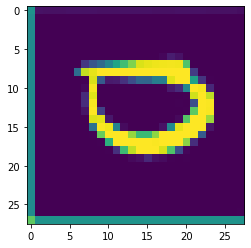

14
[515 524 536 542 552 561 567 573 575 579 589 605 613 624 640 650 655 661
 667 691 702 725 732 735 741 753 758 764 769 775 785 809 820 845 856 862
 865 872 887 904 911 918 928 932 937 951 961 963 965 985]


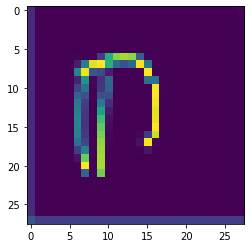

15
[502 509 520 526 529 548 558 577 587 608 611 615 626 635 662 673 679 683
 687 695 699 703 705 709 721 728 782 789 797 801 806 812 816 828 833 835
 839 850 877 880 885 895 901 920 955 972 980 990 994 997]


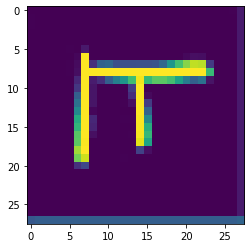

16
[501 504 510 521 528 541 551 586 596 607 616 627 631 634 644 670 678 682
 686 692 696 708 712 714 718 749 762 792 798 803 807 815 819 823 825 829
 842 868 878 884 894 899 902 921 952 973 976 979 989 998]


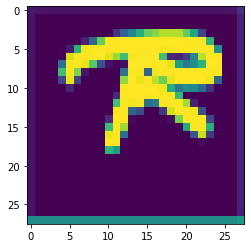

17
[512 535 539 544 554 566 572 581 591 599 604 622 642 647 649 654 669 689
 700 727 734 740 747 755 757 771 777 778 784 810 821 844 851 858 864 871
 888 897 906 917 927 929 934 939 943 950 960 967 977 986]


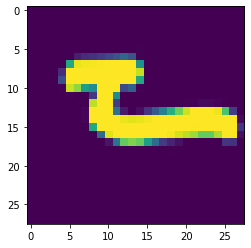

18
[517 533 546 556 560 564 570 574 583 593 602 619 638 652 658 659 665 675
 716 723 730 738 744 751 761 766 767 773 788 793 836 848 854 860 867 875
 882 890 908 912 915 925 935 941 948 958 964 969 982 993]


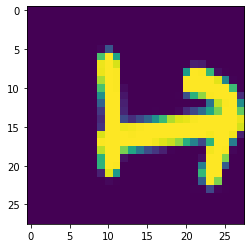

19
[507 514 518 532 537 545 555 569 582 592 597 601 620 621 630 637 646 657
 664 676 717 722 737 743 746 750 760 772 779 787 794 802 830 837 847 853
 859 874 891 907 914 924 931 940 945 947 957 968 983 992]


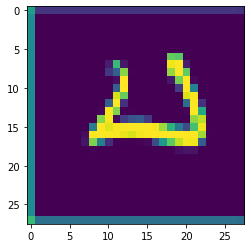

20
[1017 1027 1041 1047 1052 1055 1061 1067 1076 1083 1090 1101 1125 1138
 1143 1147 1152 1159 1180 1196 1216 1223 1231 1236 1242 1251 1263 1265
 1271 1277 1287 1292 1345 1353 1361 1367 1371 1378 1400 1412 1414 1419
 1425 1440 1446 1452 1458 1466 1473 1481]


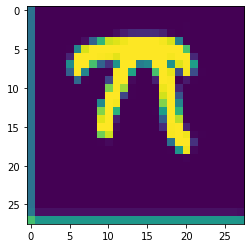

21
[1001 1011 1015 1021 1023 1049 1070 1096 1100 1106 1110 1118 1122 1149
 1162 1173 1177 1178 1182 1192 1198 1203 1207 1212 1228 1256 1257 1297
 1300 1301 1305 1315 1325 1329 1333 1338 1343 1380 1384 1386 1392 1396
 1406 1430 1449 1476 1484 1488 1494 1498]


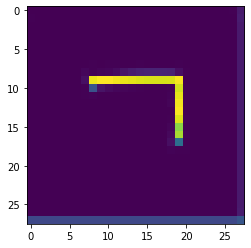

22
[1002 1004 1010 1014 1024 1034 1084 1097 1105 1109 1115 1119 1129 1157
 1165 1169 1170 1174 1185 1195 1200 1204 1209 1215 1219 1247 1290 1294
 1304 1308 1309 1312 1322 1327 1332 1336 1340 1348 1383 1393 1397 1403
 1405 1417 1464 1475 1479 1485 1489 1497]


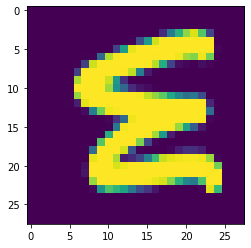

23
[1006 1029 1031 1038 1044 1057 1063 1073 1079 1086 1092 1112 1128 1132
 1134 1140 1155 1166 1186 1189 1210 1226 1232 1238 1245 1254 1259 1274
 1279 1281 1283 1318 1321 1349 1357 1364 1370 1374 1390 1409 1421 1427
 1434 1437 1443 1448 1454 1460 1470 1493]


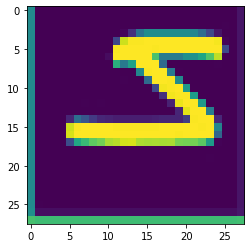

24
[1019 1028 1039 1045 1053 1056 1062 1068 1074 1080 1091 1103 1123 1139
 1144 1146 1150 1161 1181 1197 1218 1221 1230 1237 1243 1249 1264 1266
 1269 1275 1288 1291 1344 1354 1359 1365 1372 1379 1399 1410 1413 1420
 1426 1438 1444 1453 1459 1465 1471 1480]


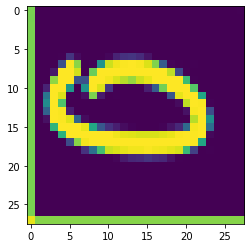

25
[1000 1012 1016 1020 1022 1048 1069 1095 1099 1107 1111 1117 1121 1148
 1163 1172 1176 1179 1183 1193 1199 1202 1206 1213 1227 1255 1258 1296
 1299 1302 1306 1314 1324 1330 1334 1337 1342 1381 1385 1387 1391 1395
 1407 1431 1450 1477 1483 1487 1495 1499]


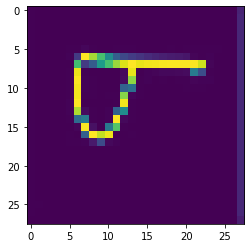

26
[1003 1005 1009 1013 1025 1035 1085 1098 1104 1108 1116 1120 1130 1158
 1164 1168 1171 1175 1184 1194 1201 1205 1208 1214 1220 1248 1289 1295
 1303 1307 1310 1313 1323 1328 1331 1335 1341 1347 1382 1394 1398 1402
 1404 1416 1463 1474 1478 1486 1490 1496 1713 1716 1719 1722 1725 1731
 1746 1753 1755 1759 1761 1764 1770 1771 1776 1779 1795]


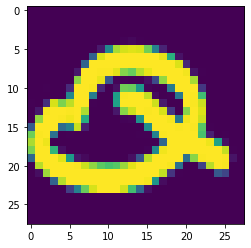

27
[1018 1026 1033 1040 1046 1054 1060 1075 1082 1088 1089 1102 1124 1133
 1137 1142 1151 1160 1217 1222 1235 1241 1246 1250 1262 1270 1276 1280
 1286 1293 1311 1326 1346 1352 1356 1360 1366 1377 1401 1411 1418 1424
 1432 1439 1445 1447 1451 1457 1472 1482 1700 1705 1706 1711 1729 1734
 1738 1740 1744 1750 1778 1783 1787 1790 1793 1798]


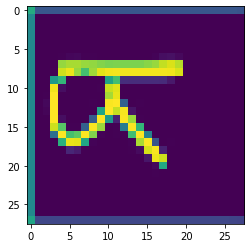

28
[1008 1030 1036 1042 1050 1058 1064 1066 1071 1077 1093 1114 1126 1135
 1141 1145 1153 1188 1191 1224 1229 1233 1239 1252 1260 1267 1272 1278
 1284 1298 1317 1320 1339 1350 1362 1368 1373 1375 1389 1408 1415 1422
 1428 1435 1441 1455 1461 1467 1468 1492 1702 1703 1708 1727 1730 1733
 1736 1739 1745 1760 1767 1784 1786 1791 1792 1799]


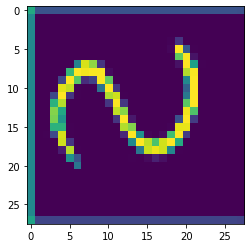

29
[1007 1032 1037 1043 1051 1059 1065 1072 1078 1081 1087 1094 1113 1127
 1131 1136 1154 1156 1167 1187 1190 1211 1225 1234 1240 1244 1253 1261
 1268 1273 1282 1285 1316 1319 1351 1355 1358 1363 1369 1376 1388 1423
 1429 1433 1436 1442 1456 1462 1469 1491 1709 1714 1715 1720 1721 1726
 1742 1748 1751 1754 1757 1763 1766 1768 1773 1774 1781 1785]


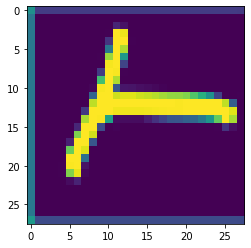

30
[1504 1520 1523 1527 1529 1535 1538 1540 1545 1546 1553 1568 1574 1577
 1581 1586 1589 1601 1613 1615 1627 1638 1641 1645 1650 1653 1658 1661
 1665 1667 1670 1690 1692 1712 1717 1718 1723 1724 1732 1747 1752 1756
 1758 1762 1765 1769 1772 1775 1780 1796]


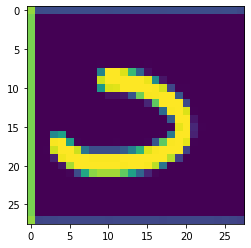

31
[1501 1506 1508 1512 1516 1521 1549 1555 1559 1562 1565 1570 1579 1591
 1596 1597 1603 1606 1611 1618 1619 1625 1628 1633 1635 1647 1673 1675
 1680 1682 1686 1687 1694 1699 1701 1704 1707 1710 1728 1735 1737 1741
 1743 1749 1777 1782 1788 1789 1794 1797]


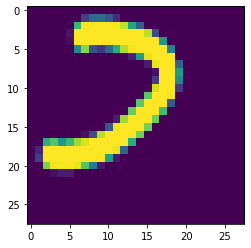

32
[1500 1507 1510 1513 1515 1532 1539 1554 1560 1561 1566 1569 1572 1584
 1594 1599 1604 1608 1609 1616 1621 1623 1630 1631 1643 1655 1656 1677
 1678 1681 1684 1689 1696 1697]


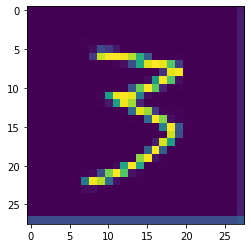

33
[1514 1518 1525 1528 1531 1533 1536 1542 1543 1548 1551 1557 1573 1578
 1583 1587 1588 1593 1605 1622 1634 1637 1642 1644 1651 1652 1659 1660
 1663 1666 1671 1674]


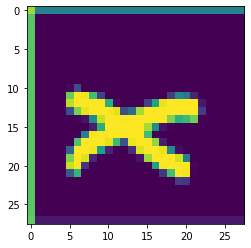

34
[1503 1519 1524 1526 1530 1534 1537 1541 1544 1547 1552 1567 1575 1576
 1582 1585 1590 1600 1612 1614 1626 1639 1640 1646 1649 1654 1657 1662
 1664 1668 1669 1691 1693]


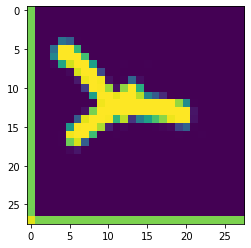

35
[1502 1505 1509 1511 1517 1522 1550 1556 1558 1563 1564 1571 1580 1592
 1595 1598 1602 1607 1610 1617 1620 1624 1629 1632 1636 1648 1672 1676
 1679 1683 1685 1688 1695 1698]


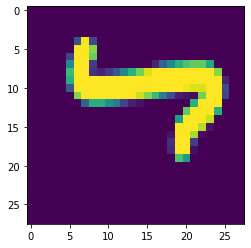

36
[1814 1823 1834 1841 1851 1860 1865 1871 1874 1878 1888 1903 1912 1922
 1938 1948 1953 1960 1966 1990 2001 2024 2031 2034 2040 2053 2057 2064
 2069 2075 2084 2109 2120 2142 2154 2161 2164 2170 2187 2203 2210 2216
 2226 2232 2237 2250 2260 2263 2265 2287]


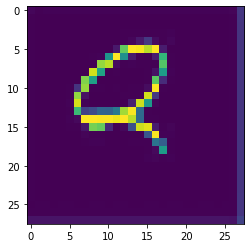

37
[1802 1809 1819 1825 1828 1847 1857 1876 1886 1907 1910 1914 1924 1933
 1961 1972 1978 1982 1986 1994 1998 2002 2004 2008 2020 2027 2082 2089
 2097 2101 2105 2111 2115 2127 2131 2133 2137 2148 2176 2179 2184 2194
 2200 2219 2255 2273 2281 2291 2294 2297]


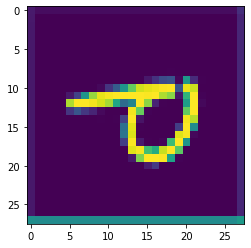

38
[1801 1804 1810 1820 1827 1840 1850 1885 1895 1906 1915 1925 1929 1932
 1942 1969 1977 1981 1985 1991 1995 2007 2011 2013 2017 2049 2062 2092
 2098 2102 2106 2114 2118 2122 2124 2128 2140 2167 2177 2183 2193 2198
 2201 2220 2252 2274 2277 2280 2290 2298]


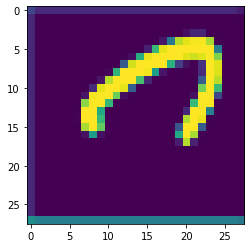

39
[1807 1817 1832 1836 1844 1854 1863 1869 1881 1891 1896 1901 1919 1928
 1935 1945 1951 1957 1963 1975 2016 2021 2038 2044 2046 2050 2061 2067
 2072 2079 2088 2093 2134 2146 2150 2151 2158 2174 2189 2206 2214 2224
 2231 2235 2240 2245 2248 2258 2268 2283]


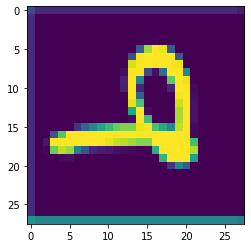

40
[1812 1822 1833 1843 1853 1861 1864 1870 1875 1880 1890 1902 1911 1920
 1940 1947 1952 1959 1968 1988 1999 2026 2030 2033 2039 2055 2056 2065
 2071 2077 2083 2110 2121 2141 2156 2163 2165 2169 2188 2205 2209 2215
 2225 2234 2239 2249 2259 2262 2267 2288]


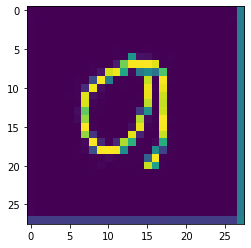

41
[1803 1808 1818 1824 1829 1848 1858 1877 1887 1908 1909 1913 1923 1934
 1962 1971 1979 1983 1987 1993 1997 2003 2005 2009 2019 2028 2081 2090
 2096 2100 2104 2112 2116 2126 2130 2132 2138 2147 2175 2180 2185 2195
 2199 2218 2254 2272 2282 2292 2295 2296]


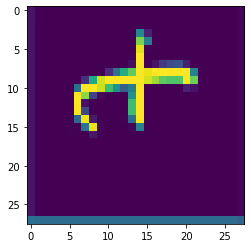

42
[1800 1805 1811 1821 1826 1839 1849 1884 1894 1905 1916 1926 1930 1931
 1941 1970 1976 1980 1984 1992 1996 2006 2010 2012 2018 2048 2063 2091
 2099 2103 2107 2113 2117 2123 2125 2129 2139 2168 2178 2182 2192 2197
 2202 2221 2253 2275 2276 2279 2289 2299]


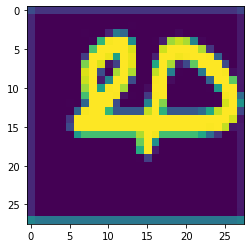

43
[1813 1835 1838 1842 1852 1866 1872 1879 1889 1898 1904 1921 1939 1946
 1949 1954 1967 1989 2000 2025 2035 2041 2047 2054 2058 2070 2076 2078
 2085 2108 2119 2143 2149 2155 2162 2171 2186 2196 2204 2217 2227 2229
 2233 2238 2243 2251 2261 2266 2278 2286]


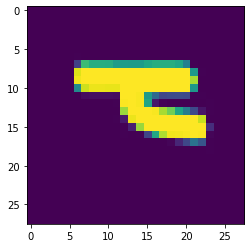

44
[1815 1831 1846 1856 1859 1862 1868 1873 1883 1893 1900 1917 1937 1950
 1956 1958 1965 1973 2014 2023 2029 2037 2043 2052 2060 2066 2068 2074
 2087 2094 2135 2145 2153 2160 2166 2173 2181 2190 2208 2211 2213 2223
 2236 2242 2247 2257 2264 2271 2284 2293]


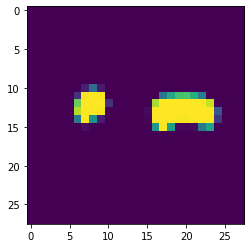

45
[1806 1816 1830 1837 1845 1855 1867 1882 1892 1897 1899 1918 1927 1936
 1943 1944 1955 1964 1974 2015 2022 2032 2036 2042 2045 2051 2059 2073
 2080 2086 2095 2136 2144 2152 2157 2159 2172 2191 2207 2212 2222 2228
 2230 2241 2244 2246 2256 2269 2270 2285]


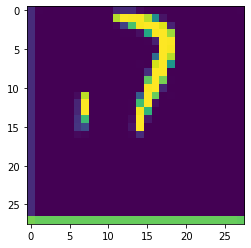

46
[2318 2329 2341 2347 2353 2356 2362 2368 2375 2381 2390 2401 2423 2438
 2443 2445 2450 2458 2479 2496 2517 2522 2530 2537 2543 2550 2564 2566
 2569 2575 2587 2590 2643 2653 2658 2664 2670 2677 2698 2710 2712 2719
 2725 2738 2744 2752 2758 2764 2771 2780]


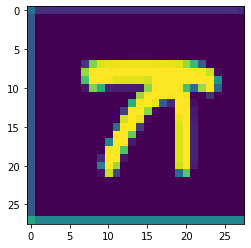

47
[2300 2312 2316 2321 2323 2349 2369 2394 2398 2406 2410 2416 2420 2447
 2461 2470 2474 2477 2481 2492 2498 2501 2505 2513 2527 2555 2558 2595
 2598 2601 2605 2613 2623 2629 2633 2636 2641 2679 2684 2686 2690 2694
 2706 2730 2749 2777 2783 2787 2795 2799]


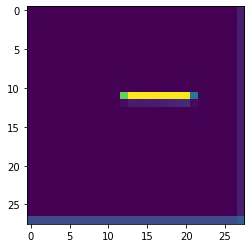

48
[2303 2305 2309 2313 2326 2336 2384 2397 2403 2407 2415 2419 2429 2456
 2462 2466 2469 2473 2482 2493 2500 2504 2507 2514 2520 2548 2588 2594
 2602 2606 2609 2612 2622 2627 2630 2634 2640 2646 2681 2693 2697 2701
 2703 2715 2762 2774 2778 2786 2790 2796]


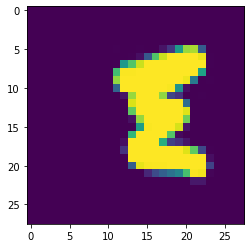

49
[2308 2331 2333 2337 2343 2359 2365 2371 2377 2386 2393 2413 2425 2430
 2435 2440 2452 2465 2486 2490 2510 2524 2534 2540 2544 2552 2561 2571
 2577 2581 2584 2615 2618 2650 2656 2660 2666 2674 2687 2707 2722 2728
 2732 2734 2740 2747 2755 2761 2767 2791]


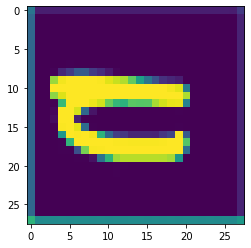

50
[2317 2327 2342 2348 2352 2354 2360 2367 2376 2382 2388 2400 2424 2436
 2441 2446 2451 2457 2478 2495 2516 2523 2531 2535 2541 2551 2562 2565
 2570 2576 2585 2592 2645 2651 2659 2665 2669 2675 2700 2711 2713 2717
 2723 2739 2745 2750 2756 2765 2772 2782]


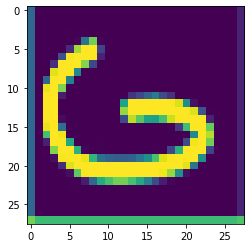

51
[2301 2311 2315 2322 2324 2350 2370 2395 2399 2405 2409 2417 2421 2448
 2460 2471 2475 2476 2480 2491 2497 2502 2506 2512 2528 2556 2557 2596
 2599 2600 2604 2614 2624 2628 2632 2637 2642 2678 2683 2685 2691 2695
 2705 2729 2748 2776 2784 2788 2794 2798]


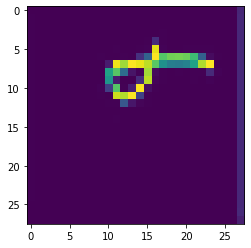

52
[2302 2304 2310 2314 2325 2335 2383 2396 2404 2408 2414 2418 2428 2455
 2463 2467 2468 2472 2483 2494 2499 2503 2508 2515 2519 2547 2589 2593
 2603 2607 2608 2611 2621 2626 2631 2635 2639 2647 2682 2692 2696 2702
 2704 2716 2763 2775 2779 2785 2789 2797]


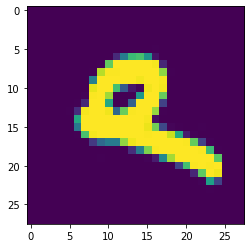

53
[2320 2328 2334 2340 2346 2355 2361 2374 2380 2387 2389 2402 2422 2432
 2437 2442 2449 2459 2518 2521 2536 2542 2546 2549 2563 2568 2574 2579
 2586 2591 2610 2625 2644 2652 2654 2657 2663 2676 2699 2709 2718 2724
 2731 2737 2743 2746 2751 2757 2770 2781]


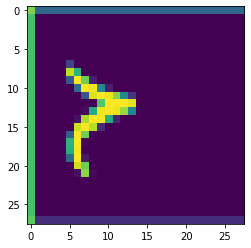

54
[2307 2330 2338 2344 2351 2357 2363 2366 2372 2378 2391 2412 2426 2433
 2439 2444 2453 2485 2489 2525 2529 2532 2538 2553 2559 2567 2572 2578
 2582 2597 2617 2620 2638 2648 2661 2667 2671 2672 2689 2708 2714 2720
 2726 2735 2741 2753 2759 2766 2768 2793]


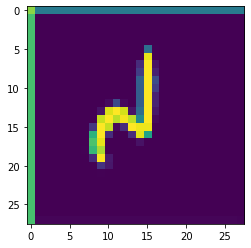

55
[2306 2319 2332 2339 2345 2358 2364 2373 2379 2385 2392 2411 2427 2431
 2434 2454 2464 2484 2487 2488 2509 2511 2526 2533 2539 2545 2554 2560
 2573 2580 2583 2616 2619 2649 2655 2662 2668 2673 2680 2688 2721 2727
 2733 2736 2742 2754 2760 2769 2773 2792]


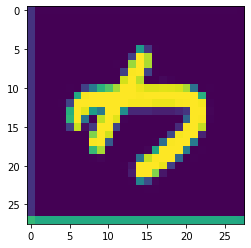

56
[2803 2819 2824 2826 2830 2834 2837 2841 2844 2847 2852 2867 2875 2876
 2882 2885 2890 2900 2912 2914 2926 2939 2940 2946 2949 2954 2957 2962
 2964 2968 2969 2991 2993 3012 3017 3018 3023 3024 3032 3047 3052 3056
 3058 3062 3065 3069 3072 3075 3080 3096]


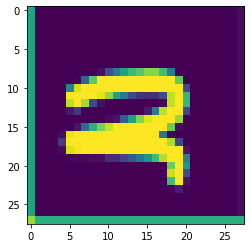

57
[2802 2805 2809 2811 2817 2822 2850 2856 2858 2863 2864 2871 2880 2892
 2895 2898 2902 2907 2910 2917 2920 2924 2929 2932 2936 2948 2972 2976
 2979 2983 2985 2988 2995 2998 3001 3004 3007 3010 3028 3035 3037 3041
 3043 3049 3077 3082 3088 3089 3094 3097]


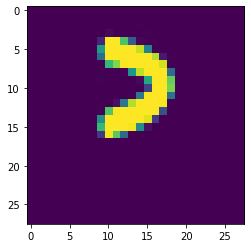

58
[2800 2807 2810 2813 2815 2832 2839 2854 2860 2861 2866 2869 2872 2884
 2894 2899 2904 2908 2909 2916 2921 2923 2930 2931 2943 2955 2956 2977
 2978 2981 2984 2989 2996 2997 3002 3003 3008 3027 3030 3033 3036 3039
 3045 3060 3067 3084 3086 3091 3092 3099]


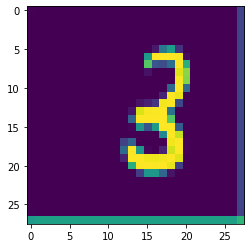

59
[2814 2818 2825 2828 2831 2833 2836 2842 2843 2848 2851 2857 2873 2878
 2883 2887 2888 2893 2905 2922 2934 2937 2942 2944 2951 2952 2959 2960
 2963 2966 2971 2974 3009 3014 3015 3020 3021 3026 3042 3048 3051 3054
 3057 3063 3066 3068 3073 3074 3081 3085]


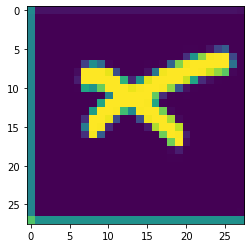

60
[2804 2820 2823 2827 2829 2835 2838 2840 2845 2846 2853 2868 2874 2877
 2881 2886 2889 2901 2913 2915 2927 2938 2941 2945 2950 2953 2958 2961
 2965 2967 2970 2990 2992 3013 3016 3019 3022 3025 3031 3046 3053 3055
 3059 3061 3064 3070 3071 3076 3079 3095]


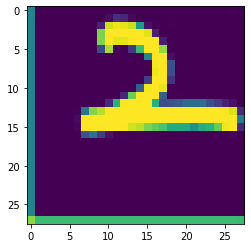

61
[2801 2806 2808 2812 2816 2821 2849 2855 2859 2862 2865 2870 2879 2891
 2896 2897 2903 2906 2911 2918 2919 2925 2928 2933 2935 2947 2973 2975
 2980 2982 2986 2987 2994 2999 3000 3005 3006 3011 3029 3034 3038 3040
 3044 3050 3078 3083 3087 3090 3093 3098]


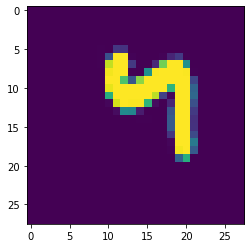

In [176]:
for i in range(62):
#     print(y_test[y_test==i])
    print(i)
    k= np.where(y_train==i)[0]
    print(np.where(y_train==i)[0])
#     plt.imshow(image(x_test[k[0]]))
    plt.imshow(x_train[k[0]])
    
    plt.show()